In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [73]:
def create_boxplot_array(file_in_path, repetitions, metric):

    plot_array = []

    for i in range(repetitions):

        name = str(file_in_path) + "_" + str(i) +".csv"
        df = pd.read_csv(name, index_col=0)

        result = df.tail(1)[metric].iloc[0]


        if metric == "Demographic_Parity" or metric == "Equal_Opportunity" :
            result = abs(result)
        

        plot_array.append(result)

    return plot_array

In [79]:
def create_boxplot_array_java(file_in_path, repetitions, metric):

    plot_array = []

    for i in range(repetitions):

        name = str(file_in_path) + "_" + str(i) +".csv"
        df = pd.read_csv(name) 

        try:
            result = df.tail(1)[metric].iloc[0]
        except:
            result = df.tail(1)[' ' + metric].iloc[0]

        if math.isnan(result):
            try:
                result = df.tail(2)[metric].iloc[0]
            except:
                result = df.tail(2)[' ' + metric].iloc[0]

        if metric == "Demographic_Parity" or metric == "Equal_Opportunity":
            result = abs(result)

        plot_array.append(result)

    return plot_array

In [59]:
def create_boxplot(repetitions, metric, paths, savepath, name, title=None):

    size = 14

    metric_array = []
    labels = []
    print(metric + '\n')

    table = {}

    ylim = (0.0, 1.0)


    if metric == 'Accuracy':
        ylim = (0.65, 0.87)
    
    elif metric in ['BalancedAccuracy', 'GeometricMean']:
        ylim = (0.25, 0.95)

    elif metric == 'CohenKappa':
        ylim = (-0.2, 0.9)

    elif metric == 'Recall':
        ylim = (0.05, 1.05)

    elif metric == 'F1':
        ylim = (0.0, 0.95)

    elif metric == 'Demographic_Parity':
        ylim = (-0.05, 0.36)

    elif metric == 'Equal_Opportunity':
        ylim = (-0.05, 0.42)

    elif metric == 'Equalized_FPR':
        ylim = (-0.2, 0.42)
    elif metric == 'Disparate_Impact':
        ylim = (-0.3, 1.1)
    elif metric == 'IndividualFairness':
        ylim = (-0.1, 0.42)


    for k in paths.keys():
        
        if not (k in ['MAS', 'CSMOTE', 'FABBOO\nSP', 'FABBOO\nEQOP']):
            array = np.array(create_boxplot_array(paths[k], repetitions, metric))
        else:
            if metric == "Equalized_FPR":
                jmetric = "Equal_FPR"
            elif metric == "IndividualFairness":
                jmetric = "Fairness_Unawareness"
            else:
                jmetric = metric
            array = np.array(create_boxplot_array_java(paths[k], repetitions, jmetric))
        print(k + ":   avg: " + f"{np.average(array):.4f}" + ", std: " + f"{np.std(array):.4f}")
        table[k] = f"{np.average(array):.4f}" + ", std: " + f"{np.std(array):.4f}"
        metric_array.append(array)
        labels.append(k)


    fig, ax = plt.subplots()
    ax.set_ylabel(metric, size=size)
    plt.yticks(size = size)

    if title is not None:
        ax.set_title(title)
    
    colors = ['orangered', 'orange', 'navajowhite', 'yellow', 'limegreen', 'cornflowerblue', 'blue', 'mediumorchid', 'hotpink']

    bplot = ax.boxplot(metric_array,
                    patch_artist=True,  # fill with color
                    tick_labels=labels)  # will be used to label x-ticks
    ax.set_ylim(ylim)
    #plt.xticks(size = size) #too big means bad overlap :(

    # fill with colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    filename = savepath + "/" + name + '_' + metric + "_boxplot.eps"
    plt.savefig(filename, format='eps', bbox_inches='tight')

    plt.show()
    return table

In [5]:
def create_learning_plot_array(file_in_path,repetitions, metric):

    plot_array = []
    min_len = -1
    temp_array = []

    for i in range(repetitions):

        name = str(file_in_path) + "_" + str(i) +".csv"
        df = pd.read_csv(name, index_col=0)

        result = df[metric].iloc[:]
        if metric == "Demographic_Parity" or metric == "Equal_Opportunity":
            result = abs(result)

        #buffer to get equal lengths of arrays - just keep last result
        if min_len == -1 or len(result) < min_len:
            min_len = len(result)

        temp_array.append(result)

    for entry in temp_array:
        plot_array.append(entry[:min_len])

    plot_array = np.array(plot_array)
    avg = np.average(plot_array, axis=0)
    return avg

In [6]:
def create_learning_plot_array_java(file_in_path, repetitions, metric):

    plot_array = []
    min_len=-1
    temp_array = []

    for i in range(repetitions):


        name = str(file_in_path) + "_" + str(i) +".csv"
        df = pd.read_csv(name)
        try:
            result = df[metric].iloc[:]
        except:
            result = df[' '+metric].iloc[:]
        
        if metric == "Demographic_Parity" or metric == "Equal_Opportunity":
            result = abs(result)

        #buffer to get equal lengths of arrays - just keep last result
        if min_len == -1 or len(result) < min_len:
            min_len = len(result)

        temp_array.append(result)

    for entry in temp_array:
        plot_array.append(entry[:min_len])

    plot_array = np.array(plot_array)
    avg = np.average(plot_array, axis=0)
    return avg


In [60]:
def create_learning_plot(repetitions, metric, paths, savepath, driftpoint, name, title=None):

    fig, ax = plt.subplots()
    size = 14
    ax.set_ylabel(metric, size=size)
    #ax.set_xlabel("Steps", size=size)

    colors = ['firebrick', 'sandybrown', 'navajowhite',  'gold', 'limegreen', 'cornflowerblue', 'darkblue', 'purple', 'hotpink']

    if title is not None:
        ax.set_title(title)

    ylim = (0.0, 1.0)

    if metric == 'Accuracy':
        ylim = (0.65, 0.87)
    
    elif metric in ['BalancedAccuracy', 'GeometricMean']:
        ylim = (0.25, 0.95)

    elif metric == 'CohenKappa':
        ylim = (-0.2, 0.9)

    elif metric == 'Recall':
        ylim = (0.05, 1.05)

    elif metric == 'F1':
        ylim = (0.0, 0.95)

    elif metric == 'Demographic_Parity':
        ylim = (-0.05, 0.36)

    elif metric == 'Equal_Opportunity':
        ylim = (-0.05, 0.42)

    elif metric == 'Equalized_FPR':
        ylim = (-0.2, 0.42)
    elif metric == 'Disparate_Impact':
        ylim = (-0.3, 1.1)
    elif metric == 'IndividualFairness':
        ylim = (-0.1, 0.42)

    i = 0

    for k in paths.keys():
        if not (k in ['MAS','CSMOTE', 'FABBOO\nSP', 'FABBOO\nEQOP']):
            array = (create_learning_plot_array(paths[k], repetitions, metric))
        else:
            if metric == "Equalized_FPR":
                jmetric = "Equal_FPR"
            elif metric == "IndividualFairness":
                jmetric = "Fairness_Unawareness"
            else:
                jmetric = metric
            array = (create_learning_plot_array_java(paths[k], repetitions, jmetric))
        ax.plot(range(1, len(array)), array[1:], label=k, color=colors[i])
        i += 1
        
    filename = savepath + "/" + name + '_' + metric + "_learning_plot"

    plt.axvline(x=driftpoint)
    ax.set_ylim(ylim)
    plt.xticks(size = size)
    plt.yticks(size = size)
    plt.savefig((filename+'_no_legend.eps'), format='eps', bbox_inches='tight')
    ax.legend(loc='upper center', bbox_to_anchor=(0.4, -0.1),
          fancybox=True, shadow=True, ncol=4, fontsize=size)
    
    plt.savefig(filename+'.eps', format='eps', bbox_inches='tight')
    plt.show()

IndividualFairness

MAS:   avg: 0.0059, std: 0.0040
2FAHT:   avg: 0.0008, std: 0.0007
CFSMO
HAT:   avg: 0.0173, std: 0.0091
CFSMO
ARF:   avg: 0.0494, std: 0.0232
CSMOTE:   avg: 0.0491, std: 0.0200
FABBOO
SP:   avg: 0.0313, std: 0.0064
FABBOO
EQOP:   avg: 0.0296, std: 0.0085


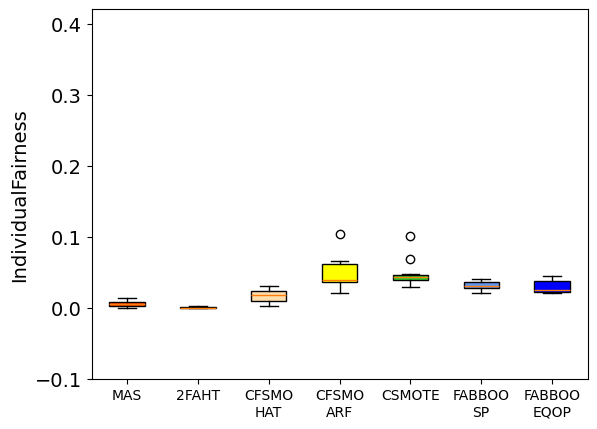

Equalized_FPR

MAS:   avg: 0.0026, std: 0.0672
2FAHT:   avg: 0.0082, std: 0.0048
CFSMO
HAT:   avg: 0.0594, std: 0.0362
CFSMO
ARF:   avg: 0.0291, std: 0.0190
CSMOTE:   avg: -0.0252, std: 0.0393
FABBOO
SP:   avg: -0.0962, std: 0.0252
FABBOO
EQOP:   avg: -0.0828, std: 0.0334


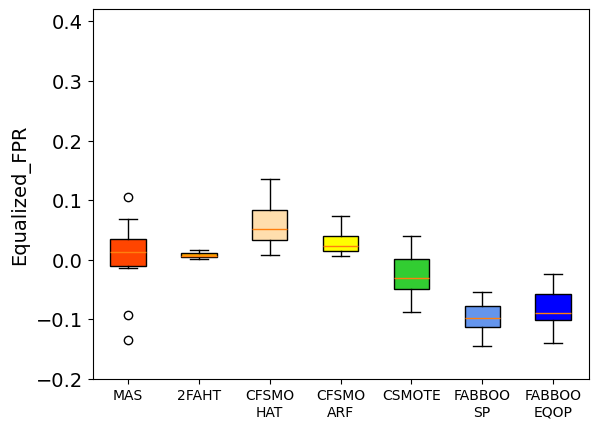

Accuracy

MAS:   avg: 0.8531, std: 0.0050
2FAHT:   avg: 0.8484, std: 0.0031
CFSMO
HAT:   avg: 0.7515, std: 0.0101
CFSMO
ARF:   avg: 0.7674, std: 0.0197
CSMOTE:   avg: 0.7377, std: 0.0132
FABBOO
SP:   avg: 0.8282, std: 0.0069
FABBOO
EQOP:   avg: 0.8274, std: 0.0066


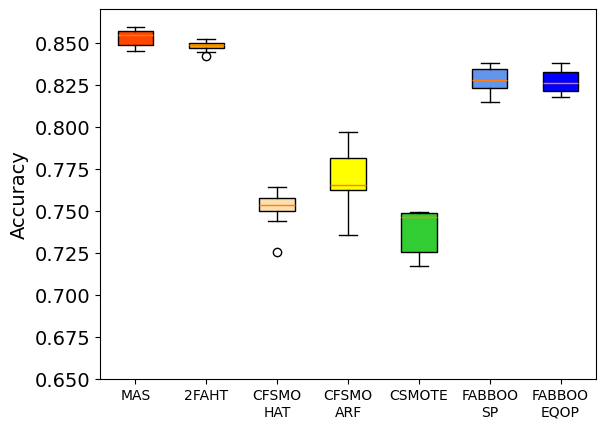

BalancedAccuracy

MAS:   avg: 0.5572, std: 0.0255
2FAHT:   avg: 0.5108, std: 0.0068
CFSMO
HAT:   avg: 0.6838, std: 0.0174
CFSMO
ARF:   avg: 0.6461, std: 0.0124
CSMOTE:   avg: 0.6374, std: 0.0186
FABBOO
SP:   avg: 0.6688, std: 0.0035
FABBOO
EQOP:   avg: 0.6710, std: 0.0034


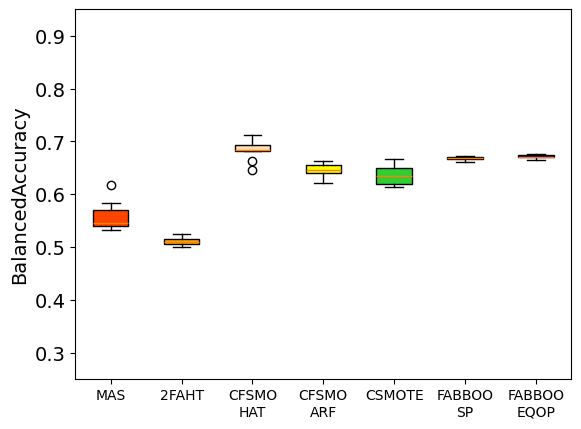

Recall

MAS:   avg: 0.9761, std: 0.0126
2FAHT:   avg: 0.9887, std: 0.0040
CFSMO
HAT:   avg: 0.7796, std: 0.0112
CFSMO
ARF:   avg: 0.8178, std: 0.0256
CSMOTE:   avg: 0.7794, std: 0.0189
FABBOO
SP:   avg: 0.8944, std: 0.0085
FABBOO
EQOP:   avg: 0.8924, std: 0.0082


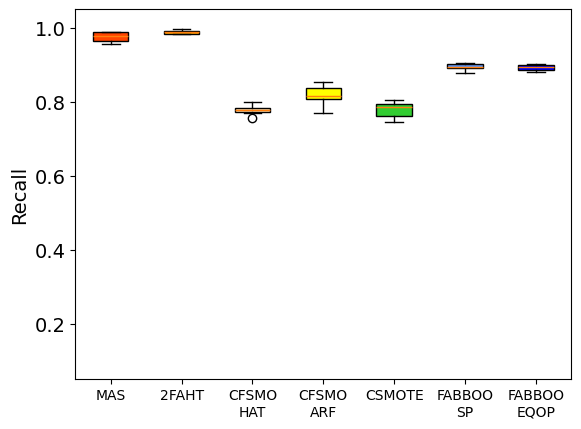

CohenKappa

MAS:   avg: 0.1588, std: 0.0560
2FAHT:   avg: 0.0341, std: 0.0208
CFSMO
HAT:   avg: 0.2702, std: 0.0241
CFSMO
ARF:   avg: 0.2404, std: 0.0284
CSMOTE:   avg: 0.2076, std: 0.0247
FABBOO
SP:   avg: 0.3299, std: 0.0106
FABBOO
EQOP:   avg: 0.3318, std: 0.0093


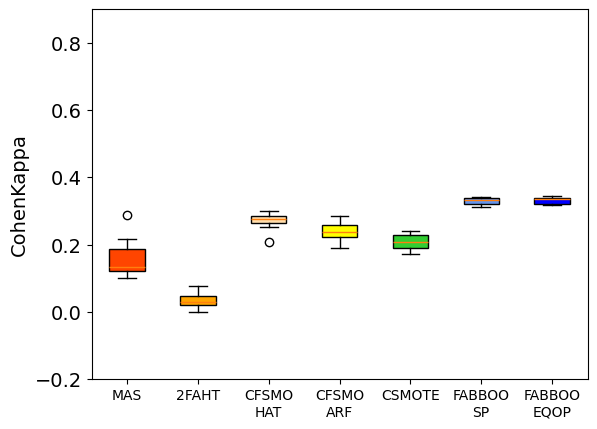

GeometricMean

MAS:   avg: 0.3583, std: 0.0760
2FAHT:   avg: 0.1731, std: 0.0505
CFSMO
HAT:   avg: 0.6767, std: 0.0199
CFSMO
ARF:   avg: 0.6224, std: 0.0144
CSMOTE:   avg: 0.6204, std: 0.0246
FABBOO
SP:   avg: 0.6295, std: 0.0050
FABBOO
EQOP:   avg: 0.6333, std: 0.0053


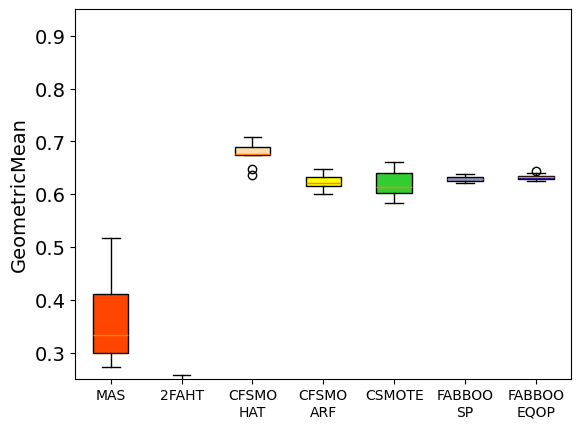

F1

MAS:   avg: 0.9189, std: 0.0032
2FAHT:   avg: 0.9176, std: 0.0020
CFSMO
HAT:   avg: 0.8425, std: 0.0071
CFSMO
ARF:   avg: 0.8569, std: 0.0142
CSMOTE:   avg: 0.8352, std: 0.0102
FABBOO
SP:   avg: 0.8988, std: 0.0046
FABBOO
EQOP:   avg: 0.8982, std: 0.0045


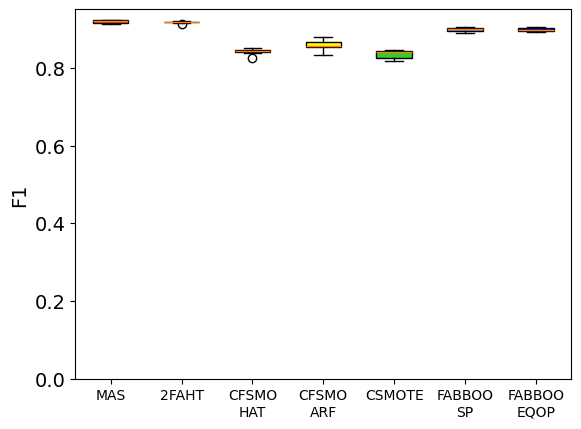

Demographic_Parity

MAS:   avg: 0.0107, std: 0.0075
2FAHT:   avg: 0.0027, std: 0.0018
CFSMO
HAT:   avg: 0.0310, std: 0.0136
CFSMO
ARF:   avg: 0.0247, std: 0.0123
CSMOTE:   avg: 0.0476, std: 0.0183
FABBOO
SP:   avg: 0.0070, std: 0.0066
FABBOO
EQOP:   avg: 0.0138, std: 0.0080


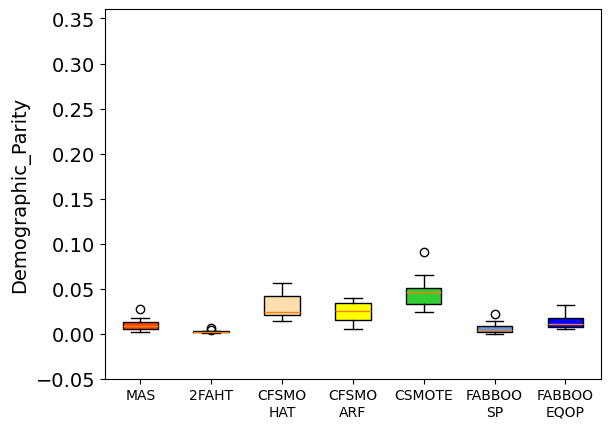

Equal_Opportunity

MAS:   avg: 0.0129, std: 0.0054
2FAHT:   avg: 0.0027, std: 0.0014
CFSMO
HAT:   avg: 0.0242, std: 0.0116
CFSMO
ARF:   avg: 0.0189, std: 0.0101
CSMOTE:   avg: 0.0434, std: 0.0191
FABBOO
SP:   avg: 0.0050, std: 0.0067
FABBOO
EQOP:   avg: 0.0095, std: 0.0050


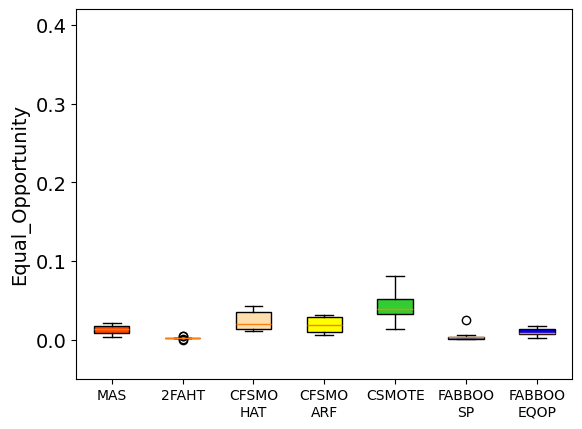

Disparate_Impact

MAS:   avg: 0.0113, std: 0.0080
2FAHT:   avg: 0.0028, std: 0.0018
CFSMO
HAT:   avg: 0.0420, std: 0.0185
CFSMO
ARF:   avg: 0.0315, std: 0.0153
CSMOTE:   avg: 0.0625, std: 0.0230
FABBOO
SP:   avg: 0.0083, std: 0.0079
FABBOO
EQOP:   avg: 0.0164, std: 0.0095


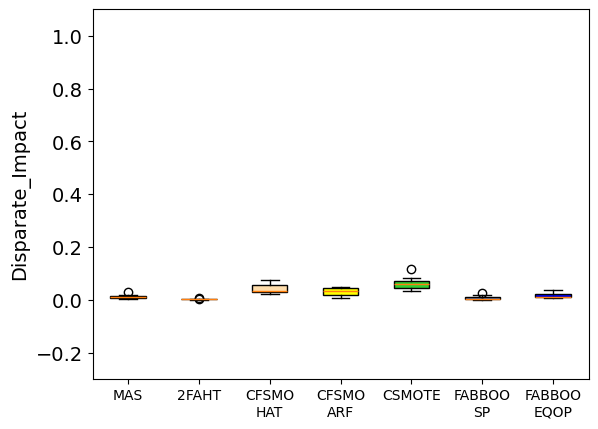

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


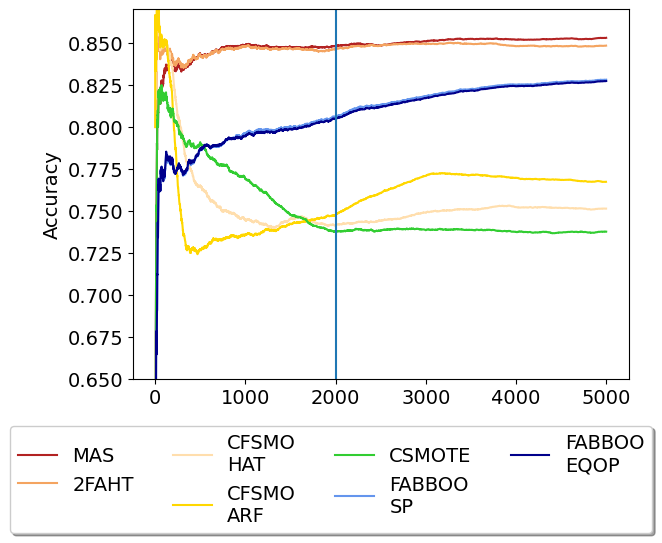

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


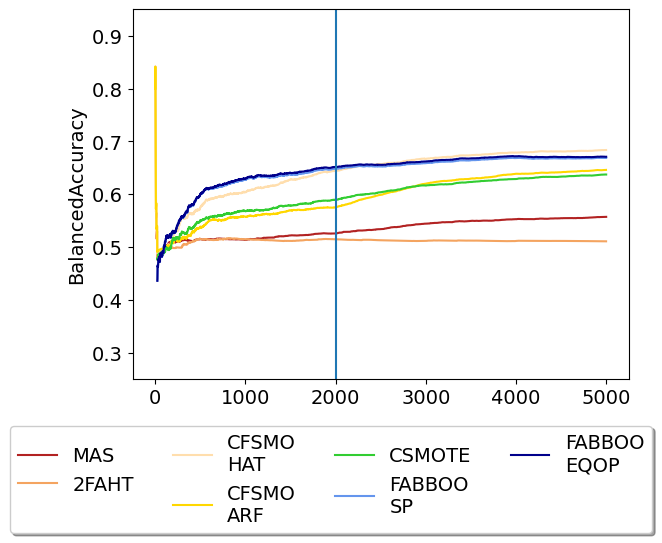

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


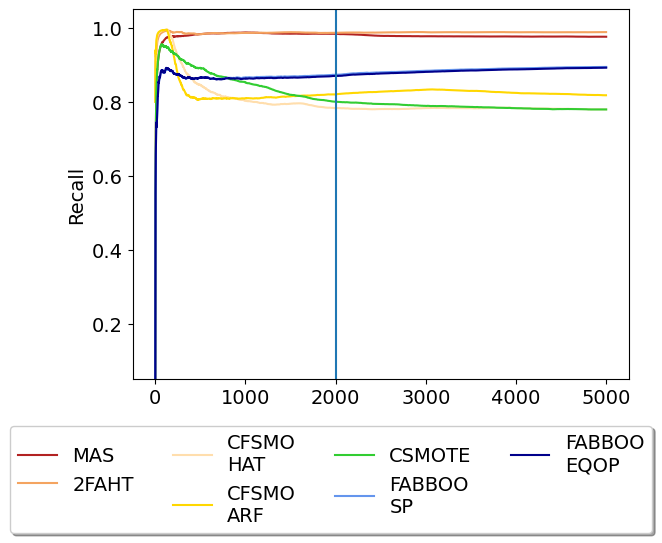

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


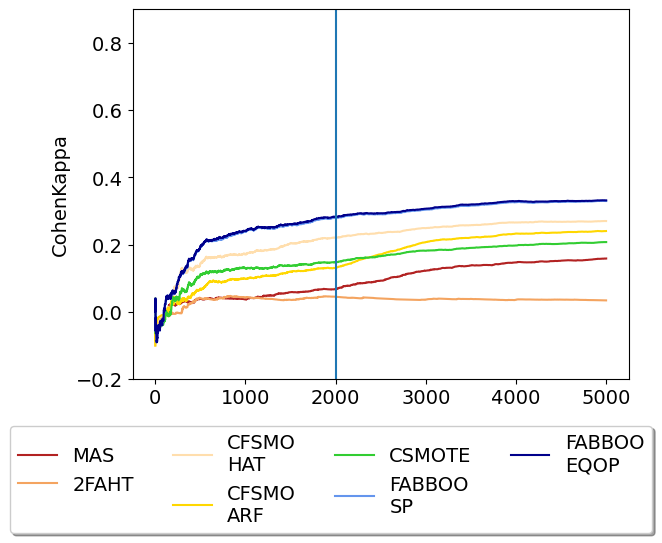

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


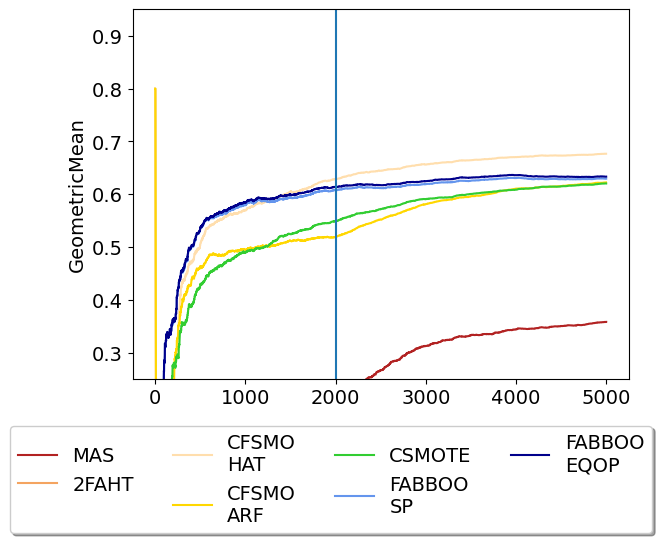

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


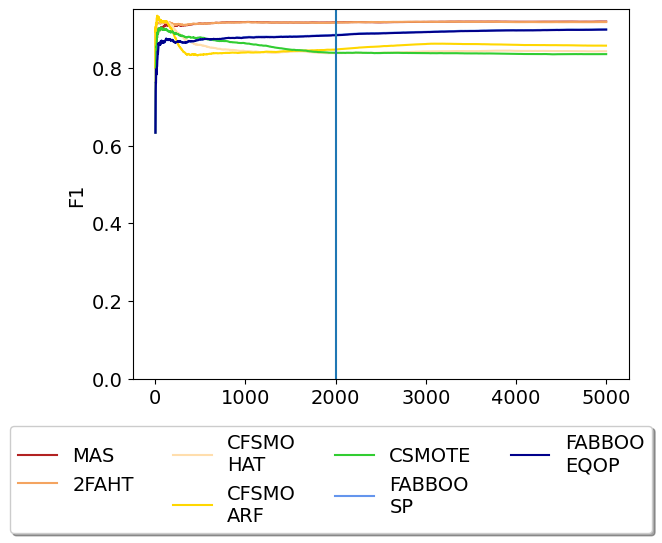

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


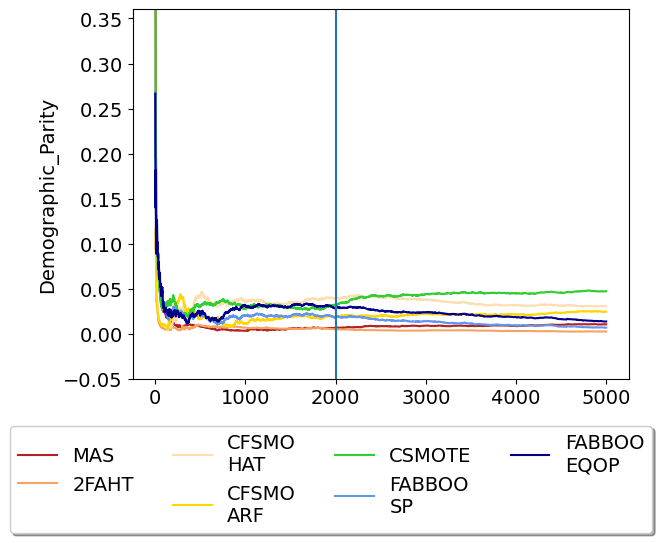

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


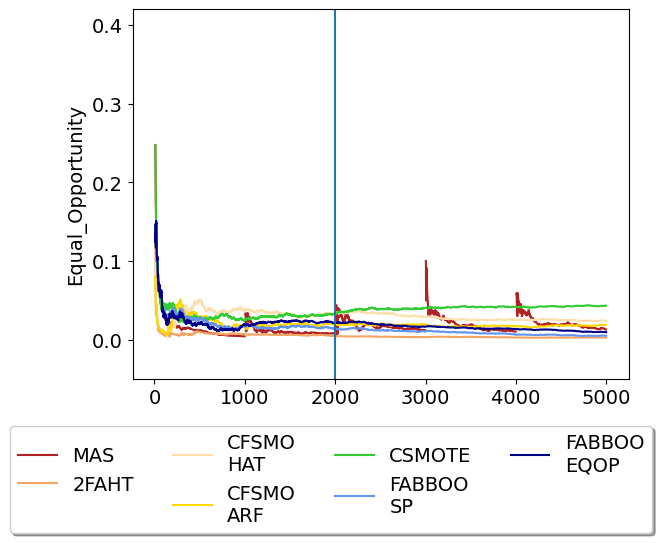

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


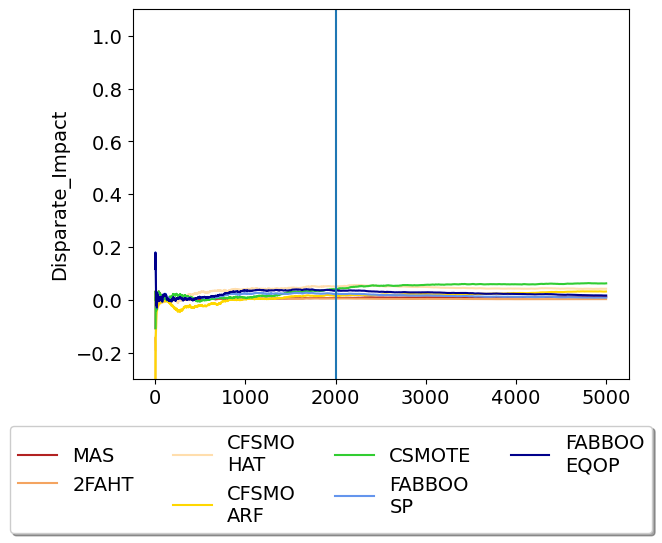

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


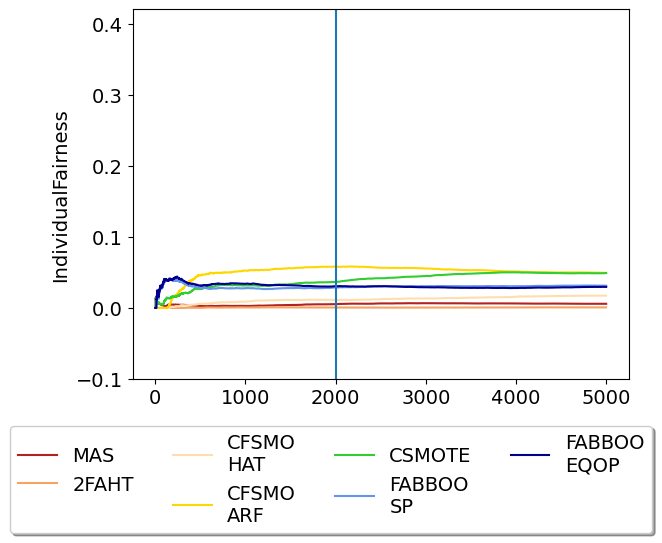

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


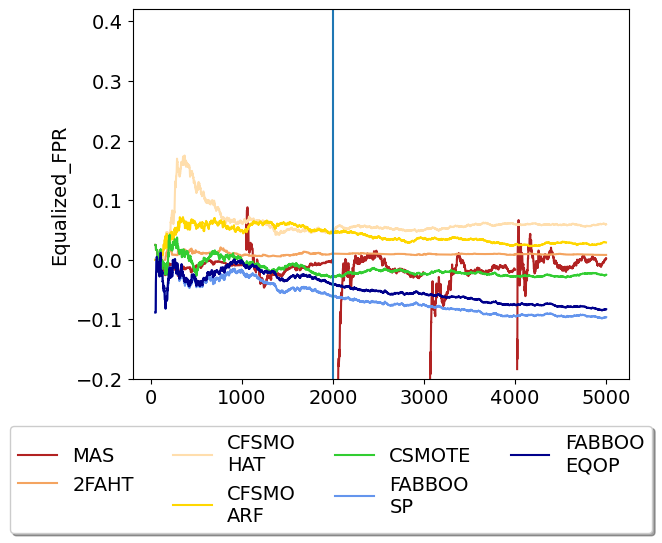

In [84]:
mode = 'eval_paper/student_performance/unmodified_to_'
name = 'internet_era_2000'
mode = mode + name
driftpoint = 2000

paths = {}
paths['MAS'] = f"./data/{mode}/massaging/run"
#paths['FAHT']= f"./data/{mode}/results_faht/run"
#paths['FEAT'] = f"./data/{mode}/feat/run"
#paths['FEAT*'] = f"./data/control_no_fnlwgt/FEAT/run"
paths['2FAHT'] = f"./data/{mode}/results_2faht/run"
paths['CFSMO\nHAT'] = f"./data/{mode}/results_cfsmote/run"
paths['CFSMO\nARF'] = f"./data/{mode}/results_cfsmote_arf/run"
paths['CSMOTE'] = f"./data/{mode}/csmote/run"
paths['FABBOO\nSP'] = f"./data/{mode}/fabboo/optimized_sp/run"
paths['FABBOO\nEQOP'] = f"./data/{mode}/fabboo/optimized_eqop/run"


#title="Scenario Sensitive Attribute Switch,\n Drift at timestep 20.000\n(Unmodified Synthetic Adult, w/o fnlwgt and empty fields, with '?')"
title = name
savepath = f"./data/{mode}"
table = {}

table["Individual Fairness"] = create_boxplot(10, "IndividualFairness", paths,savepath, title)
table["Equal FPR"] = create_boxplot(10, "Equalized_FPR", paths,savepath, title)
table["Accuracy"] = create_boxplot(10, "Accuracy", paths, savepath, title)
table["Balanced Accuracy"] = create_boxplot(10, "BalancedAccuracy", paths,savepath, title)
table["Recall"] = create_boxplot(10, "Recall", paths,savepath, title)
table["Cohen Kappa"] = create_boxplot(10, "CohenKappa", paths,savepath, title)
table["Geometric Mean"] = create_boxplot(10, "GeometricMean", paths,savepath, title)
table["F1 Score"] = create_boxplot(10, "F1", paths,savepath, title)
table["Statistical Parity"] = create_boxplot(10, "Demographic_Parity", paths,savepath, title)
table["Equal Opportunity"] = create_boxplot(10, "Equal_Opportunity", paths,savepath, title)
table["Disparate Impact"] = create_boxplot(10, "Disparate_Impact", paths,savepath, title)


df = pd.DataFrame(table)
df.to_csv(savepath + "/table.csv")


create_learning_plot(10, "Accuracy", paths,savepath, driftpoint, title)
create_learning_plot(10, "BalancedAccuracy", paths,savepath,driftpoint, title)
create_learning_plot(10, "Recall", paths,savepath,driftpoint, title)
create_learning_plot(10, "CohenKappa", paths,savepath,driftpoint, title)
create_learning_plot(10, "GeometricMean", paths,savepath,driftpoint, title)
create_learning_plot(10, "F1", paths,savepath,driftpoint, title)
create_learning_plot(10, "Demographic_Parity", paths,savepath,driftpoint, title)
create_learning_plot(10, "Equal_Opportunity", paths,savepath,driftpoint, title)
create_learning_plot(10, "Disparate_Impact", paths,savepath,driftpoint, title)
create_learning_plot(10, "IndividualFairness", paths,savepath,driftpoint, title)
create_learning_plot(10, "Equalized_FPR", paths,savepath,driftpoint, title)

In [ ]:
import pandas as pd
import glob

In [ ]:
df = pd.read_csv('./data/synth_adult/results_sampling_bias_clean_3/table.csv')

In [ ]:
def formatTuple(str):
    if "," in str:
        a, b = str.split(',')
        a = float(a) * 100
        b = float(b[6:]) * 100
        return f'${a:.2f} \\\\pm {b:.2f}$'

In [ ]:
name = 'sampling_clean'
l = list(df.columns)
l.remove(name)

In [ ]:
df[l] = df[l].map(formatTuple)

In [ ]:
melt_df = df.melt([name], var_name='score')
df_final = melt_df.pivot(index='score', columns=name, values='value')
# df_final.columns = [f'\\\\rotatebox{{90}}{{{c}}}' for c in df_final.columns]

In [ ]:
print(df_final.to_latex(escape=False))

\begin{tabular}{lllllllll}
\toprule
sampling_clean & 1FAHT & 1FEAT & 2FAHT & CFSMO
ARF & CFSMO
HAT & CSMOTE & FABBOO
EQOP & FABBOO
SP \\
score &  &  &  &  &  &  &  &  \\
\midrule
Accuracy & $88.50 \\pm 0.15$ & $89.35 \\pm 0.41$ & $89.70 \\pm 0.15$ & $85.12 \\pm 0.44$ & $81.30 \\pm 0.61$ & $82.84 \\pm 0.91$ & $87.86 \\pm 0.27$ & $87.84 \\pm 0.25$ \\
Balanced Accuracy & $58.48 \\pm 1.58$ & $63.20 \\pm 1.73$ & $63.96 \\pm 1.61$ & $77.68 \\pm 0.58$ & $78.87 \\pm 0.66$ & $79.11 \\pm 0.40$ & $78.67 \\pm 0.41$ & $78.72 \\pm 0.42$ \\
Cohen Kappa & $24.11 \\pm 3.55$ & $34.87 \\pm 3.77$ & $36.91 \\pm 2.86$ & $44.67 \\pm 1.13$ & $40.12 \\pm 1.21$ & $42.43 \\pm 1.53$ & $50.60 \\pm 0.60$ & $50.61 \\pm 0.59$ \\
Equal Opportunity & $1.32 \\pm 0.65$ & $0.86 \\pm 0.86$ & $1.26 \\pm 0.87$ & $1.04 \\pm 0.87$ & $0.86 \\pm 0.72$ & $0.74 \\pm 0.58$ & $0.58 \\pm 0.56$ & $0.85 \\pm 0.73$ \\
F1 Score & $28.40 \\pm 3.98$ & $39.69 \\pm 3.79$ & $41.54 \\pm 3.13$ & $53.01 \\pm 0.92$ & $50.04 \\pm 0.95$ & $51.72 \\